In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1. Import des données
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('2000_2021_SINGLE_TURKEY_FIRE_M_C61_214067.csv')

C:\Users\amaur\AppData\Local\Temp\ipykernel_21848\3377045064.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2000_2021_SINGLE_TURKEY_FIRE_M_C61_214067.csv')


In [4]:
# 2. Analyse descriptive des données
# Afficher les premières lignes du DataFrame pour avoir un aperçu des données
print("Aperçu des données :")
print(df.head())

# Afficher les informations générales sur le DataFrame
print("\nInformations sur les données :")
print(df.info())

# Afficher les statistiques descriptives pour les variables quantitatives
print("\nStatistiques descriptives des variables quantitatives :")
print(df.describe())

Aperçu des données :
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   36.8527    35.3594       306.0   2.1    1.4  2000-11-01       815   
1   40.5441    35.1786       307.8   1.1    1.0  2000-11-02       857   
2   40.1473    35.0444       305.3   1.1    1.0  2000-11-02       857   
3   40.5421    35.1909       310.0   1.1    1.0  2000-11-02       857   
4   41.2569    31.4172       307.9   1.1    1.0  2000-11-02       857   

  satellite instrument  confidence version  bright_t31   frp daynight  type  
0     Terra      MODIS          60    6.03       294.4  13.2        D   0.0  
1     Terra      MODIS          66    6.03       296.0   5.8        D   0.0  
2     Terra      MODIS          46    6.03       293.5   4.3        D   0.0  
3     Terra      MODIS          69    6.03       296.1   7.3        D   0.0  
4     Terra      MODIS           0    6.03       290.4   8.0        D   2.0  

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
Ra

In [5]:
# 3. Nettoyage des données
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes (si nécessaire)
df_cleaned = df.dropna()

# Vérifier les doublons
print("\nNombre de doublons :")
print(df.duplicated().sum())

# Supprimer les doublons (si nécessaire)
df_cleaned = df_cleaned.drop_duplicates()


Valeurs manquantes par colonne :
latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          5391
dtype: int64

Nombre de doublons :
0


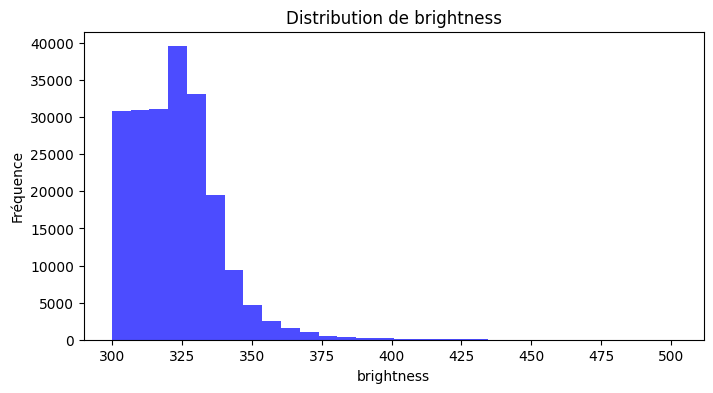

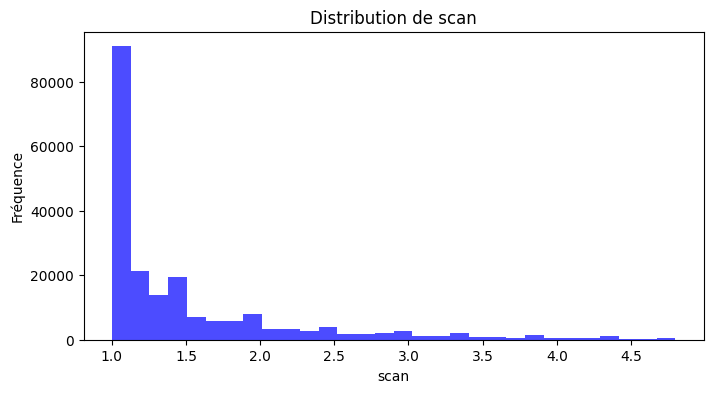

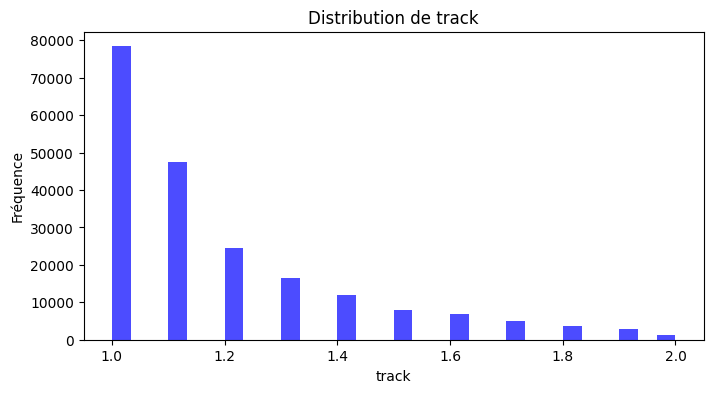

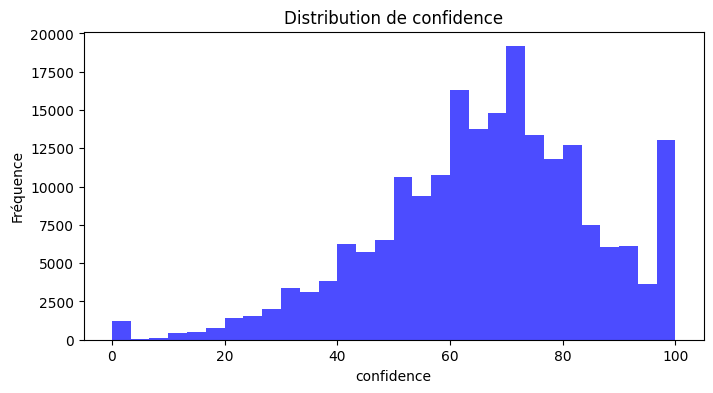

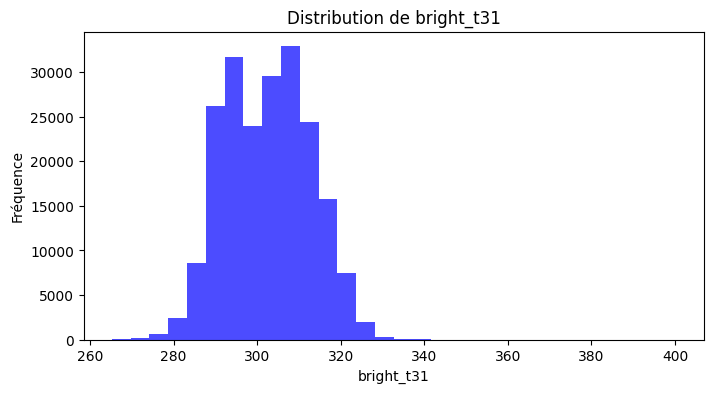

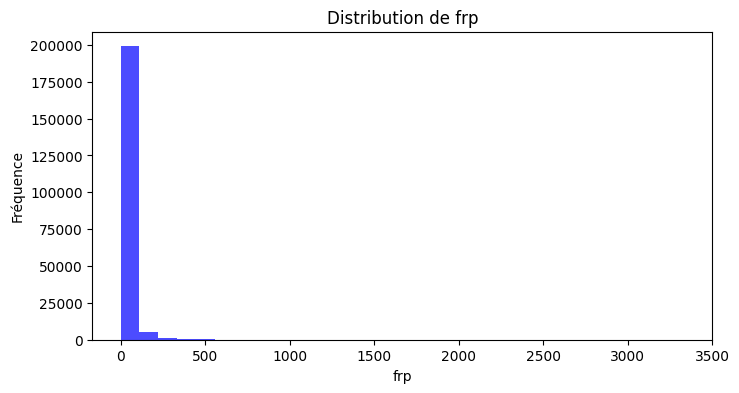

In [6]:
# 4. Présentation des variables quantitatives
# Sélectionner les colonnes quantitatives
quantitative_columns = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']

# Afficher des graphiques pour les variables quantitatives
for col in quantitative_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_cleaned[col], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

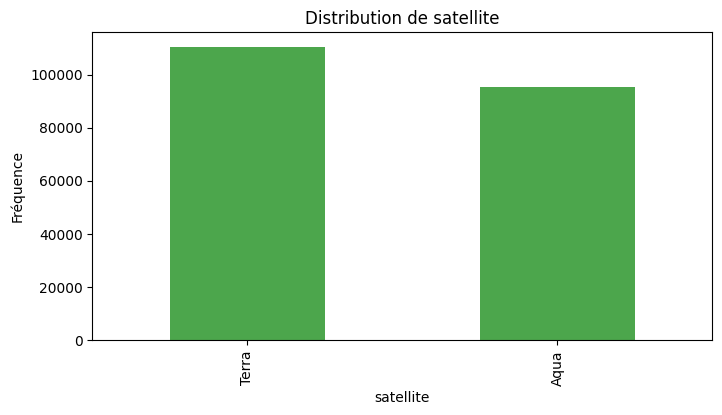

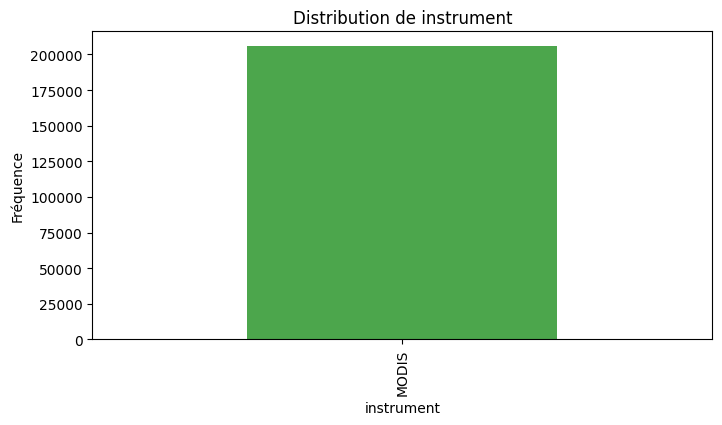

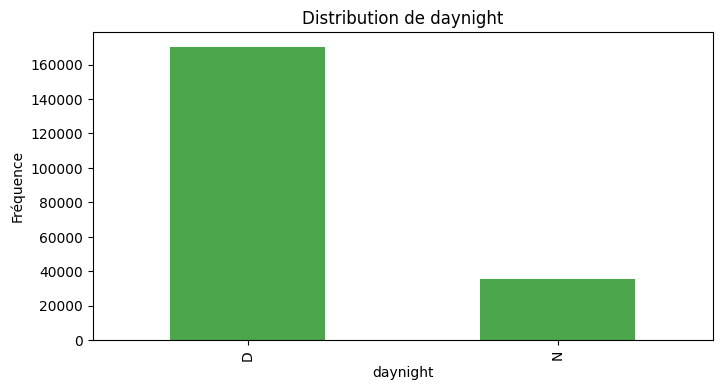

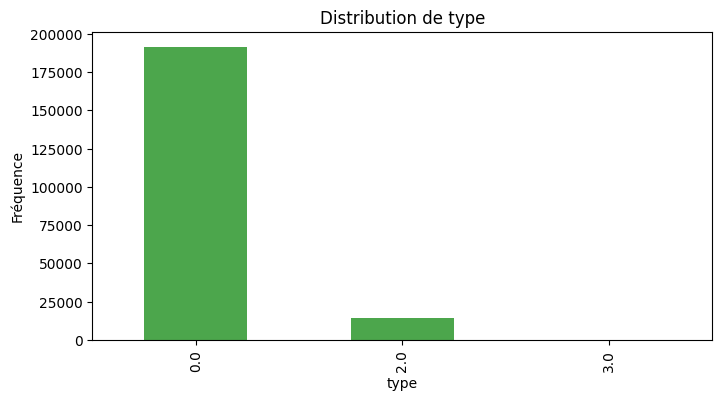


Valeurs uniques pour satellite:
['Terra' 'Aqua']

Valeurs uniques pour instrument:
['MODIS']

Valeurs uniques pour daynight:
['D' 'N']

Valeurs uniques pour type:
[0. 2. 3.]


In [7]:
# 5. Présentation des variables qualitatives
# Sélectionner les colonnes qualitatives
qualitative_columns = ['satellite', 'instrument', 'daynight', 'type']

# Afficher des graphiques pour les variables qualitatives
for col in qualitative_columns:
    plt.figure(figsize=(8, 4))
    df_cleaned[col].value_counts().plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

# Afficher les valeurs uniques pour chaque variable qualitative
for col in qualitative_columns:
    print(f"\nValeurs uniques pour {col}:")
    print(df_cleaned[col].unique())

In [8]:
# 6. Filtrage des données (exemple : filtrer les données pour le satellite 'Terra')
df_filtered = df_cleaned[df_cleaned['satellite'] == 'Terra']

# Afficher les premières lignes du DataFrame filtré
print("\nAperçu des données filtrées (satellite 'Terra') :")
print(df_filtered.head())


Aperçu des données filtrées (satellite 'Terra') :
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   36.8527    35.3594       306.0   2.1    1.4  2000-11-01       815   
1   40.5441    35.1786       307.8   1.1    1.0  2000-11-02       857   
2   40.1473    35.0444       305.3   1.1    1.0  2000-11-02       857   
3   40.5421    35.1909       310.0   1.1    1.0  2000-11-02       857   
4   41.2569    31.4172       307.9   1.1    1.0  2000-11-02       857   

  satellite instrument  confidence version  bright_t31   frp daynight  type  
0     Terra      MODIS          60    6.03       294.4  13.2        D   0.0  
1     Terra      MODIS          66    6.03       296.0   5.8        D   0.0  
2     Terra      MODIS          46    6.03       293.5   4.3        D   0.0  
3     Terra      MODIS          69    6.03       296.1   7.3        D   0.0  
4     Terra      MODIS           0    6.03       290.4   8.0        D   2.0  


In [9]:
# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV (optionnel)
df_filtered.to_csv('filtered_data.csv', index=False)